# MUPS2A (PM2THV1T) Filtering Notebook

## Package Imports

### Standard Packages

In [1]:
from os.path import expanduser
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

### Ska Packages

In [2]:
from Ska.engarchive import fetch_eng as fetch
from Chandra.Time import DateTime

### Local Packages

In [3]:
home = expanduser("~")
addthispath = home + '/WIP/mups/mups_filtering/mups_filtering/'
sys.path.append(addthispath)
from mups_filtering import *

### Local Notebook Settings

In [4]:
%matplotlib notebook
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
def genplot(tstart='2014:200', tstop='2014:250', ymin=None, ymax=None):
    xtick = np.linspace(DateTime(tstart).secs, DateTime(tstop).secs, 10)
    xlab = [lab[:11] for lab in DateTime(xtick).date]
    fig = plt.figure(facecolor=[1,1,1],figsize=(15,8))
    ax = fig.add_axes([0.1, 0.15, 0.8, 0.7])
    ax.set_xticks(xtick)
    ax.set_xticklabels(xlab, fontsize=16, rotation=45, ha='right', rotation_mode="anchor")
    ax.grid(True)
    ax.set_ylabel('Temperature in F', fontsize=18)
    ax.set_xlabel('Time (Seconds)', fontsize=18)
    ax.set_ylim(ymin, ymax)
    ax.set_yticklabels(ax.get_yticks(), fontsize=16)
    ax.set_xlim(DateTime(tstart).secs, DateTime(tstop).secs)
    return fig, ax

In [6]:
tstart = '2019:001:18:00:00' # Starts at good telemetry
tstop = None
data = fetch.Msidset(['pitch', 'roll', 'pm2thv1t', 'pm1thv2t'], tstart, tstop, stat=None)
data.interpolate()

times = data.times
vals = data['pm2thv1t'].vals
tstop = DateTime(times[-1]).date

<IPython.core.display.Javascript object>


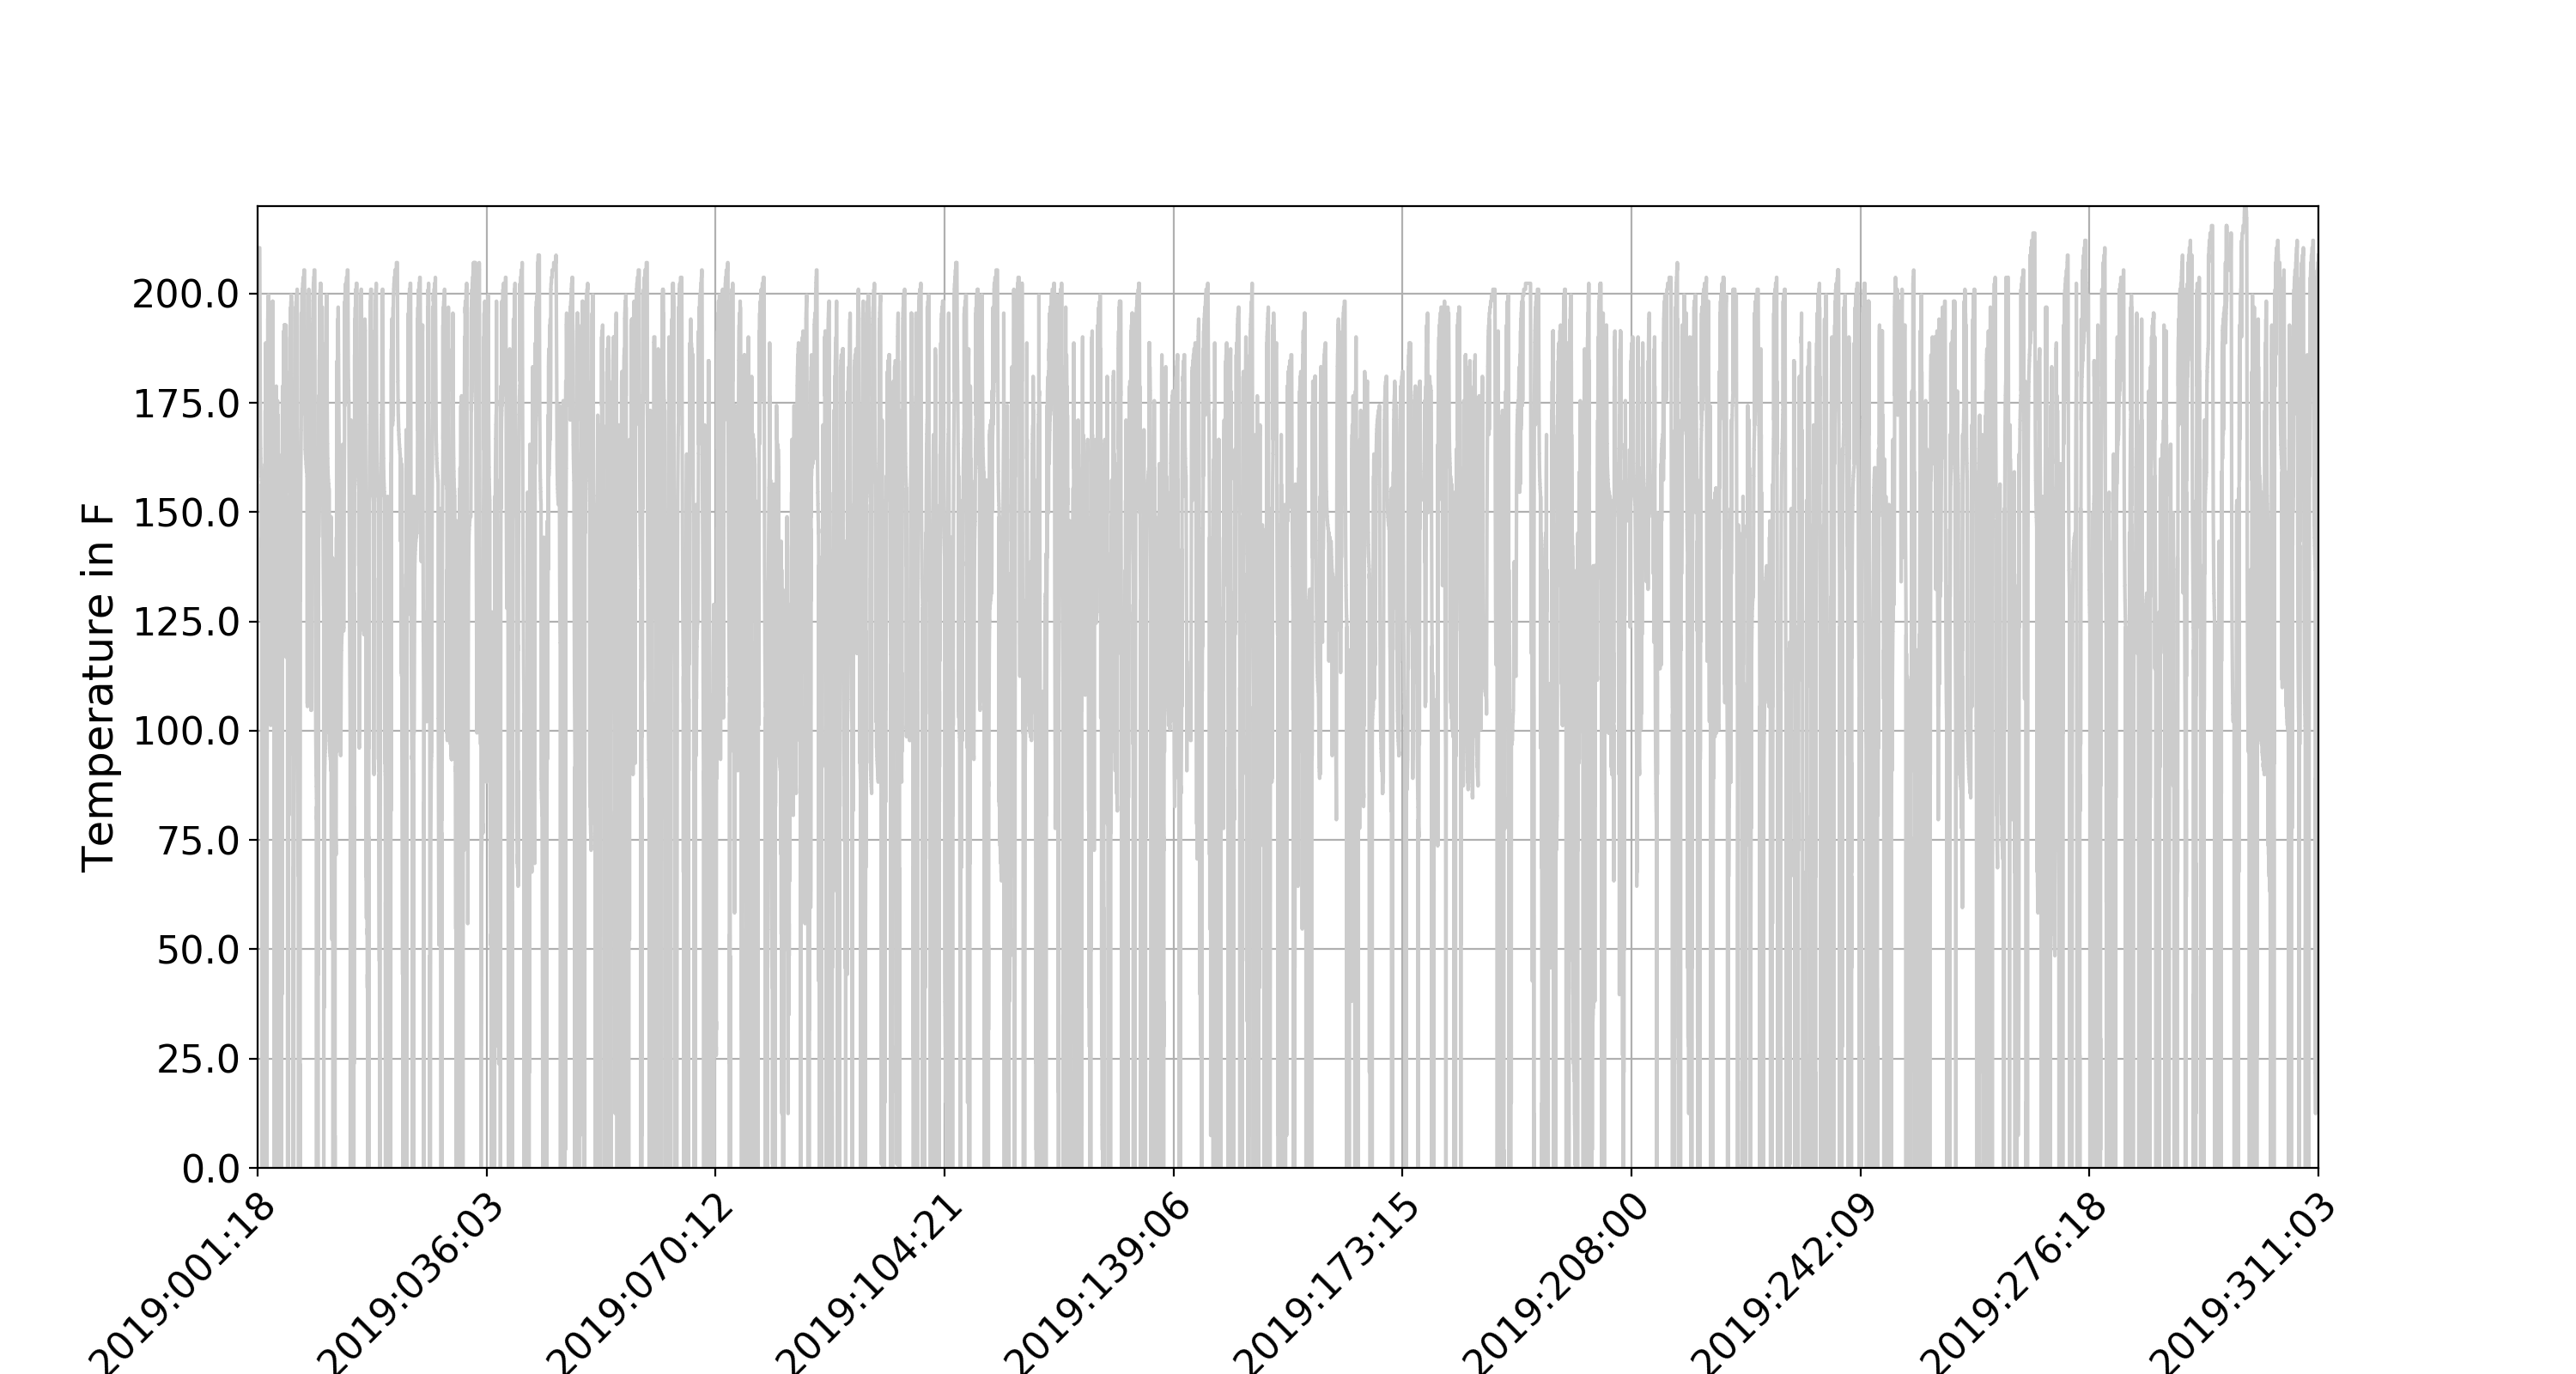

In [7]:
fig, ax = genplot(tstart=tstart, tstop=tstop, ymin=0, ymax=220)
ax.plot(data.times, data['pm2thv1t'].vals, color=[0.8, 0.8, 0.8])
_ = ax.set_yticklabels(ax.get_yticks(), fontsize=16)

<IPython.core.display.Javascript object>


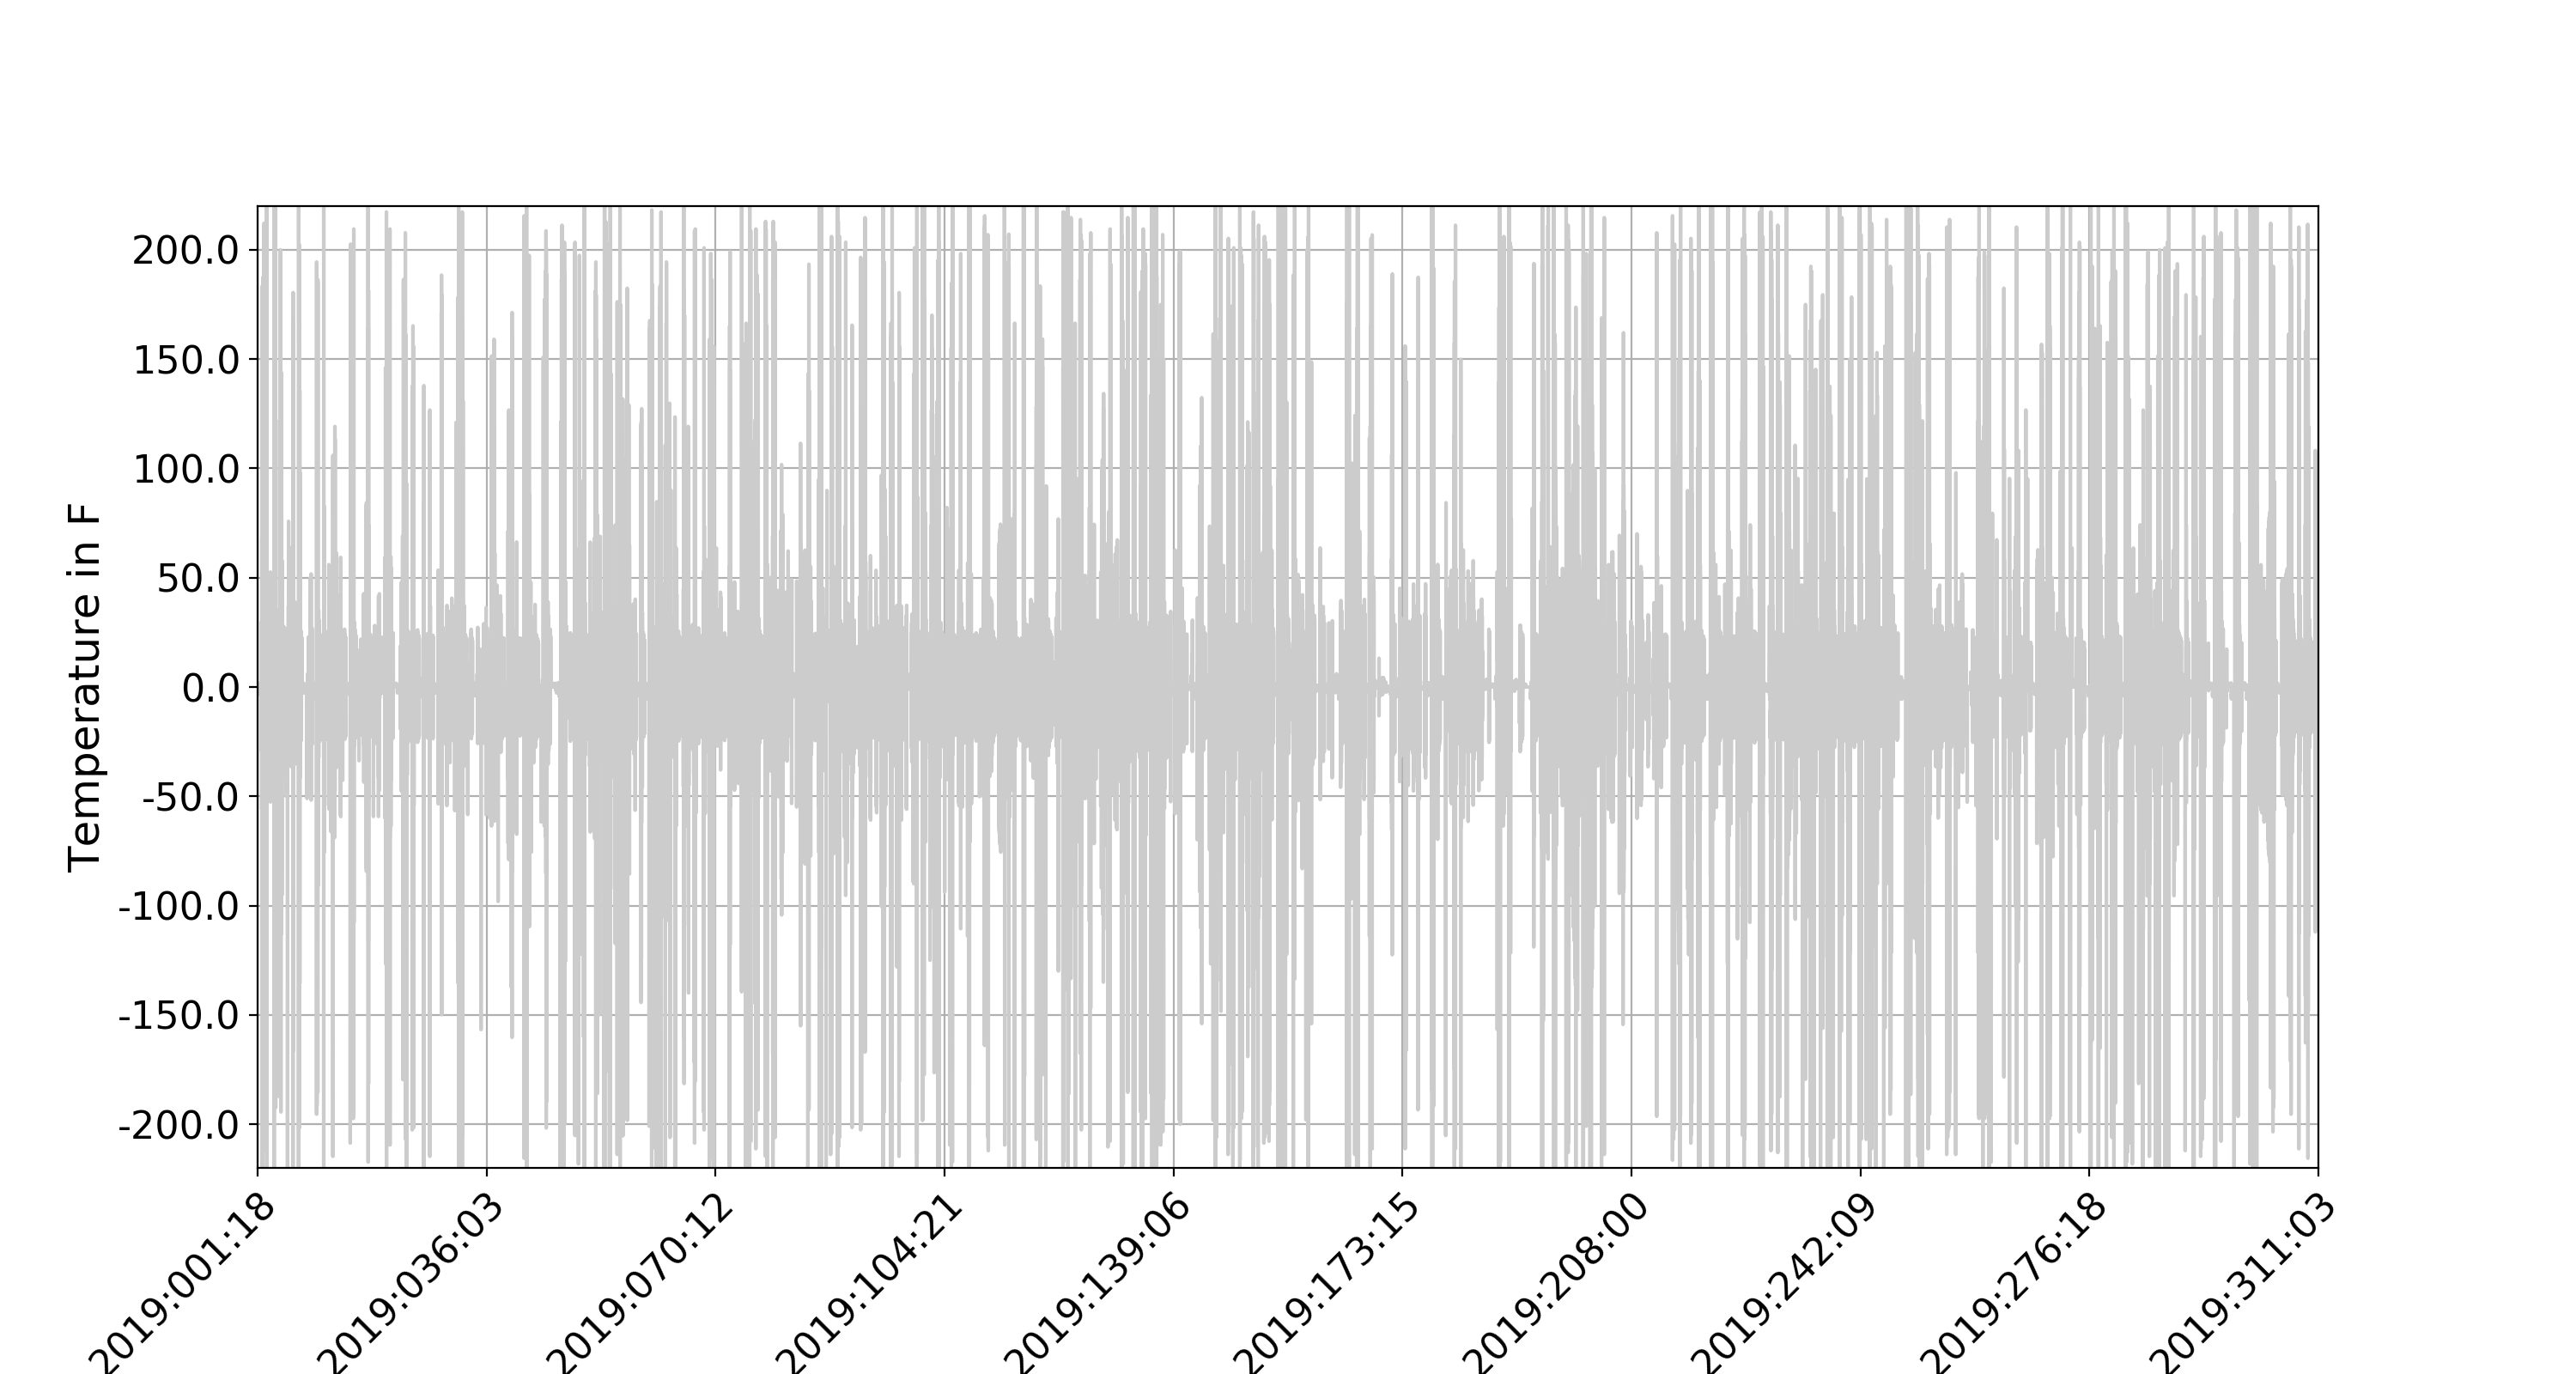

In [8]:
fig, ax = genplot(tstart=tstart, tstop=tstop, ymin=-220, ymax=220)
ax.plot(data.times[:-1], np.diff(data['pm2thv1t'].vals), color=[0.8, 0.8, 0.8])
_ = ax.set_yticklabels(ax.get_yticks(), fontsize=16)

<IPython.core.display.Javascript object>


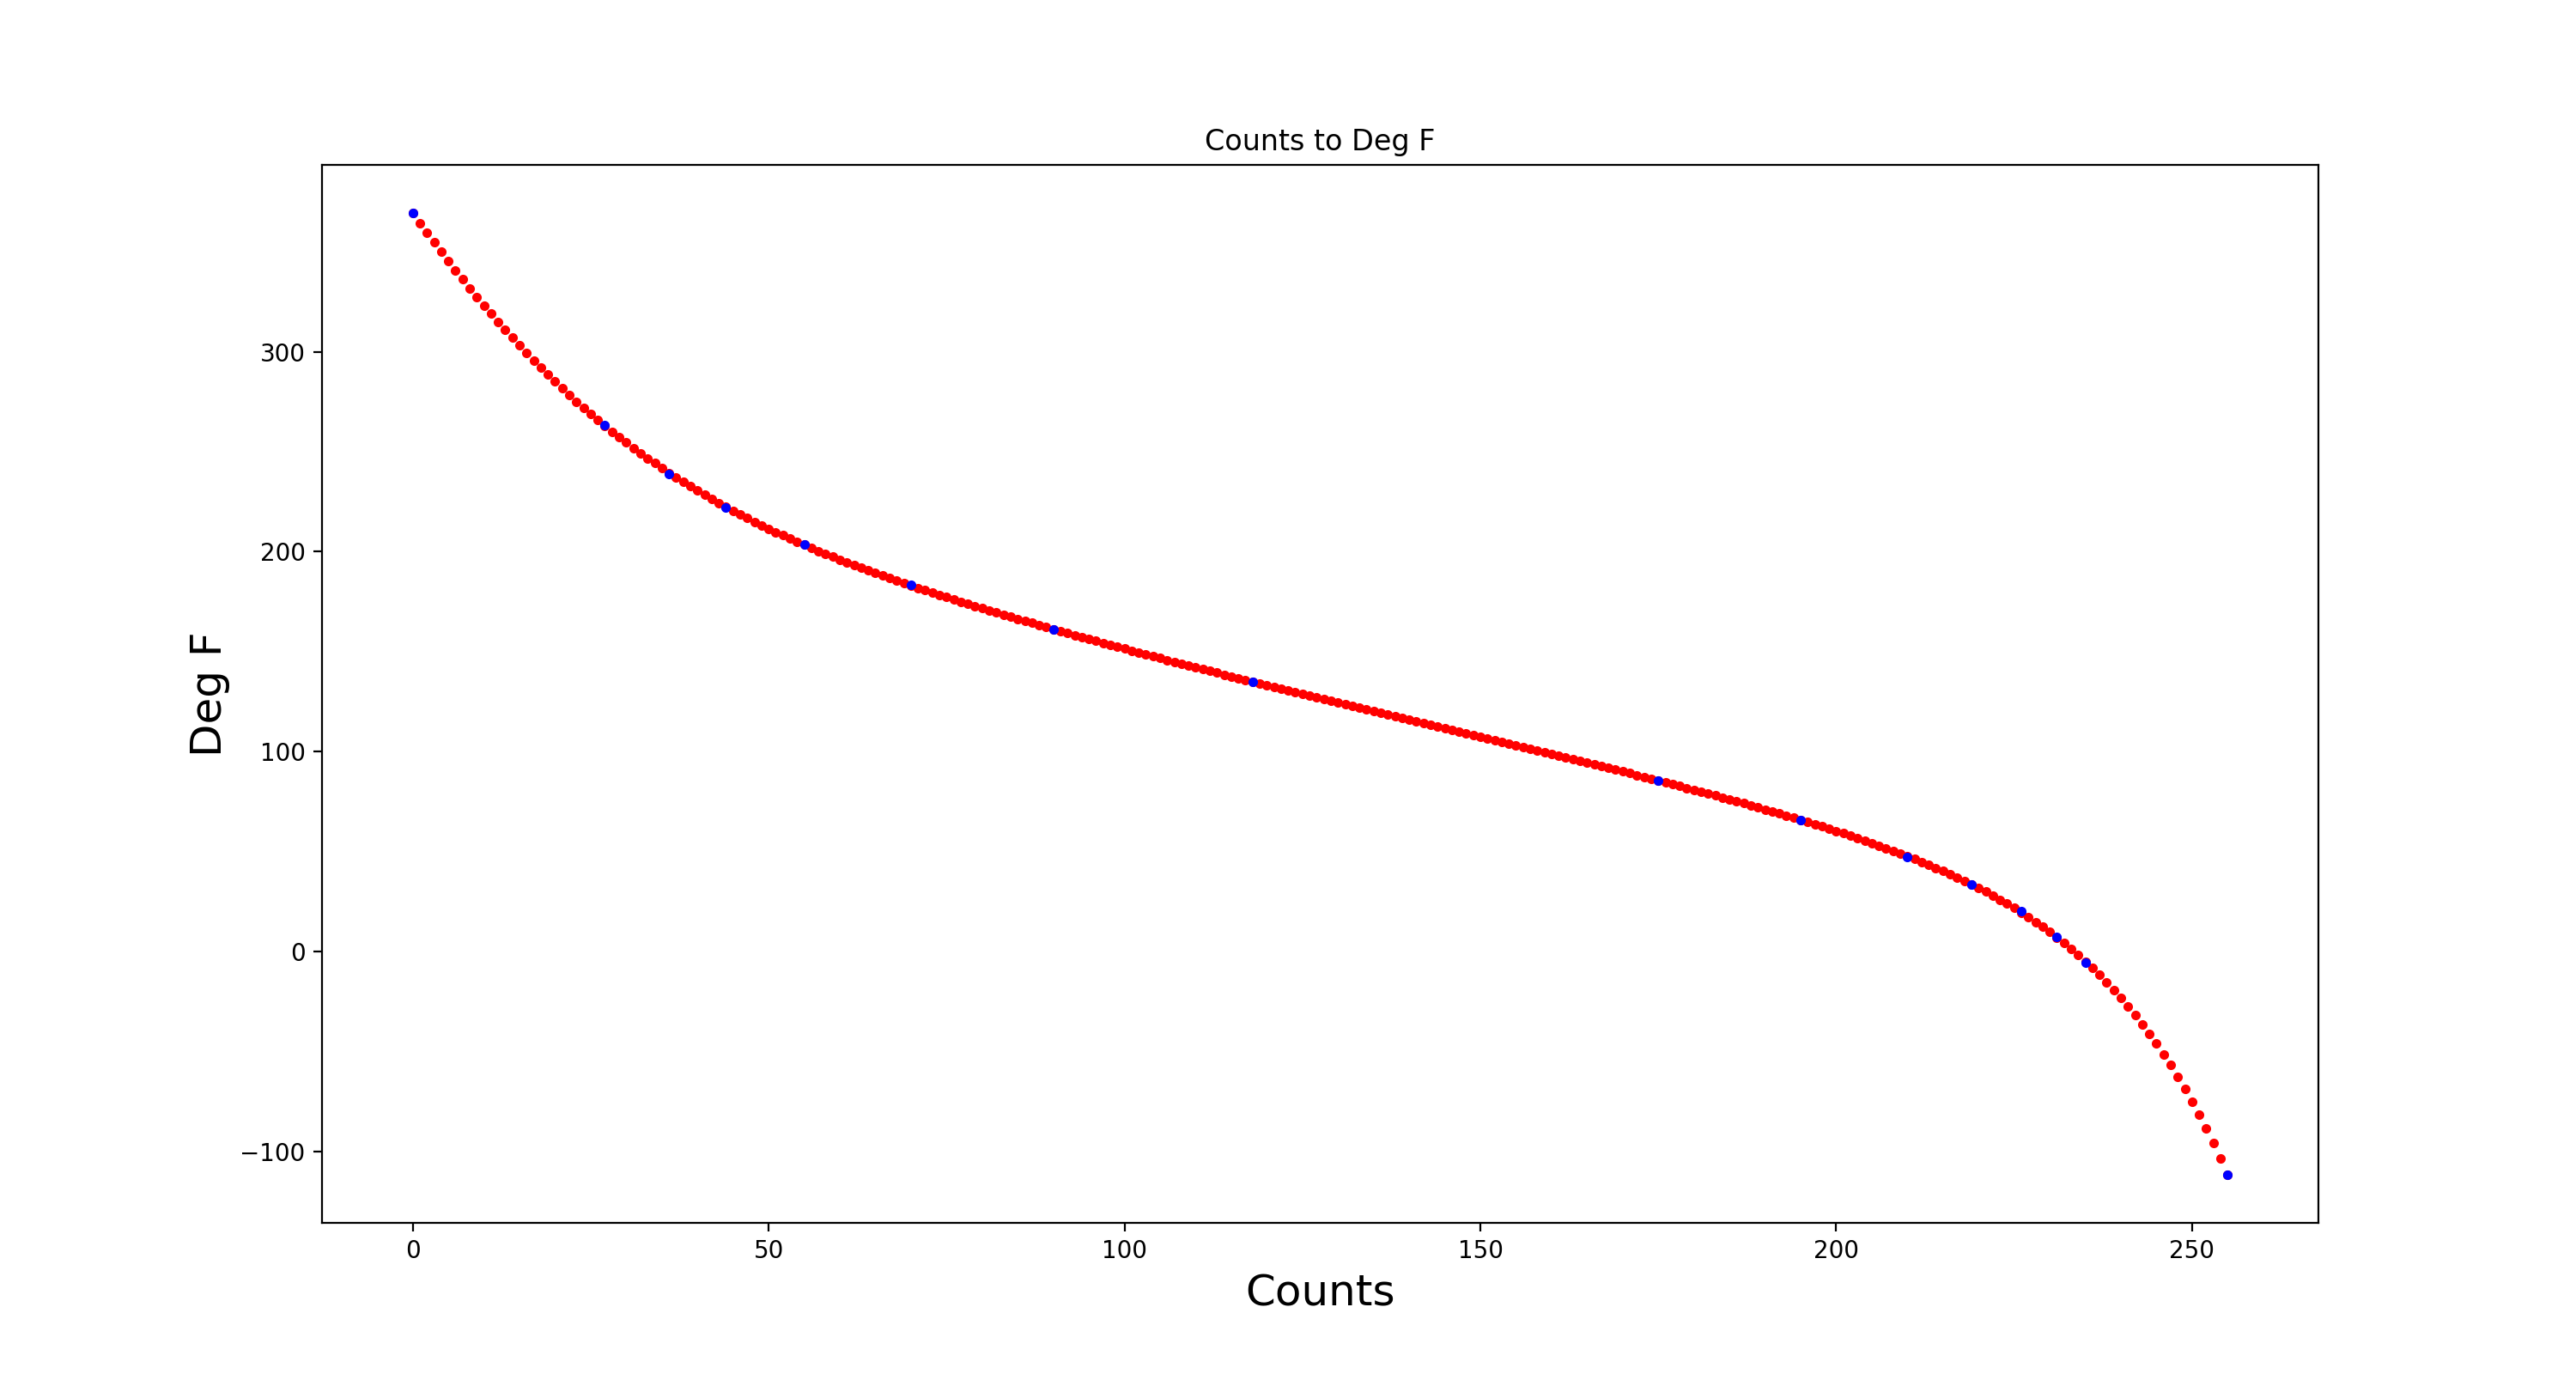

In [9]:
fig =plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, 256),count_to_degf(np.arange(0, 256)),'r.')
plt.plot(pp_counts,pp_temps,'b.')
plt.xlabel('Counts',fontsize=18)
plt.ylabel('Deg F',fontsize=18)
plt.title('Counts to Deg F')

In [10]:
corrected_temps = nearest_value_signal_correction(vals)

<IPython.core.display.Javascript object>


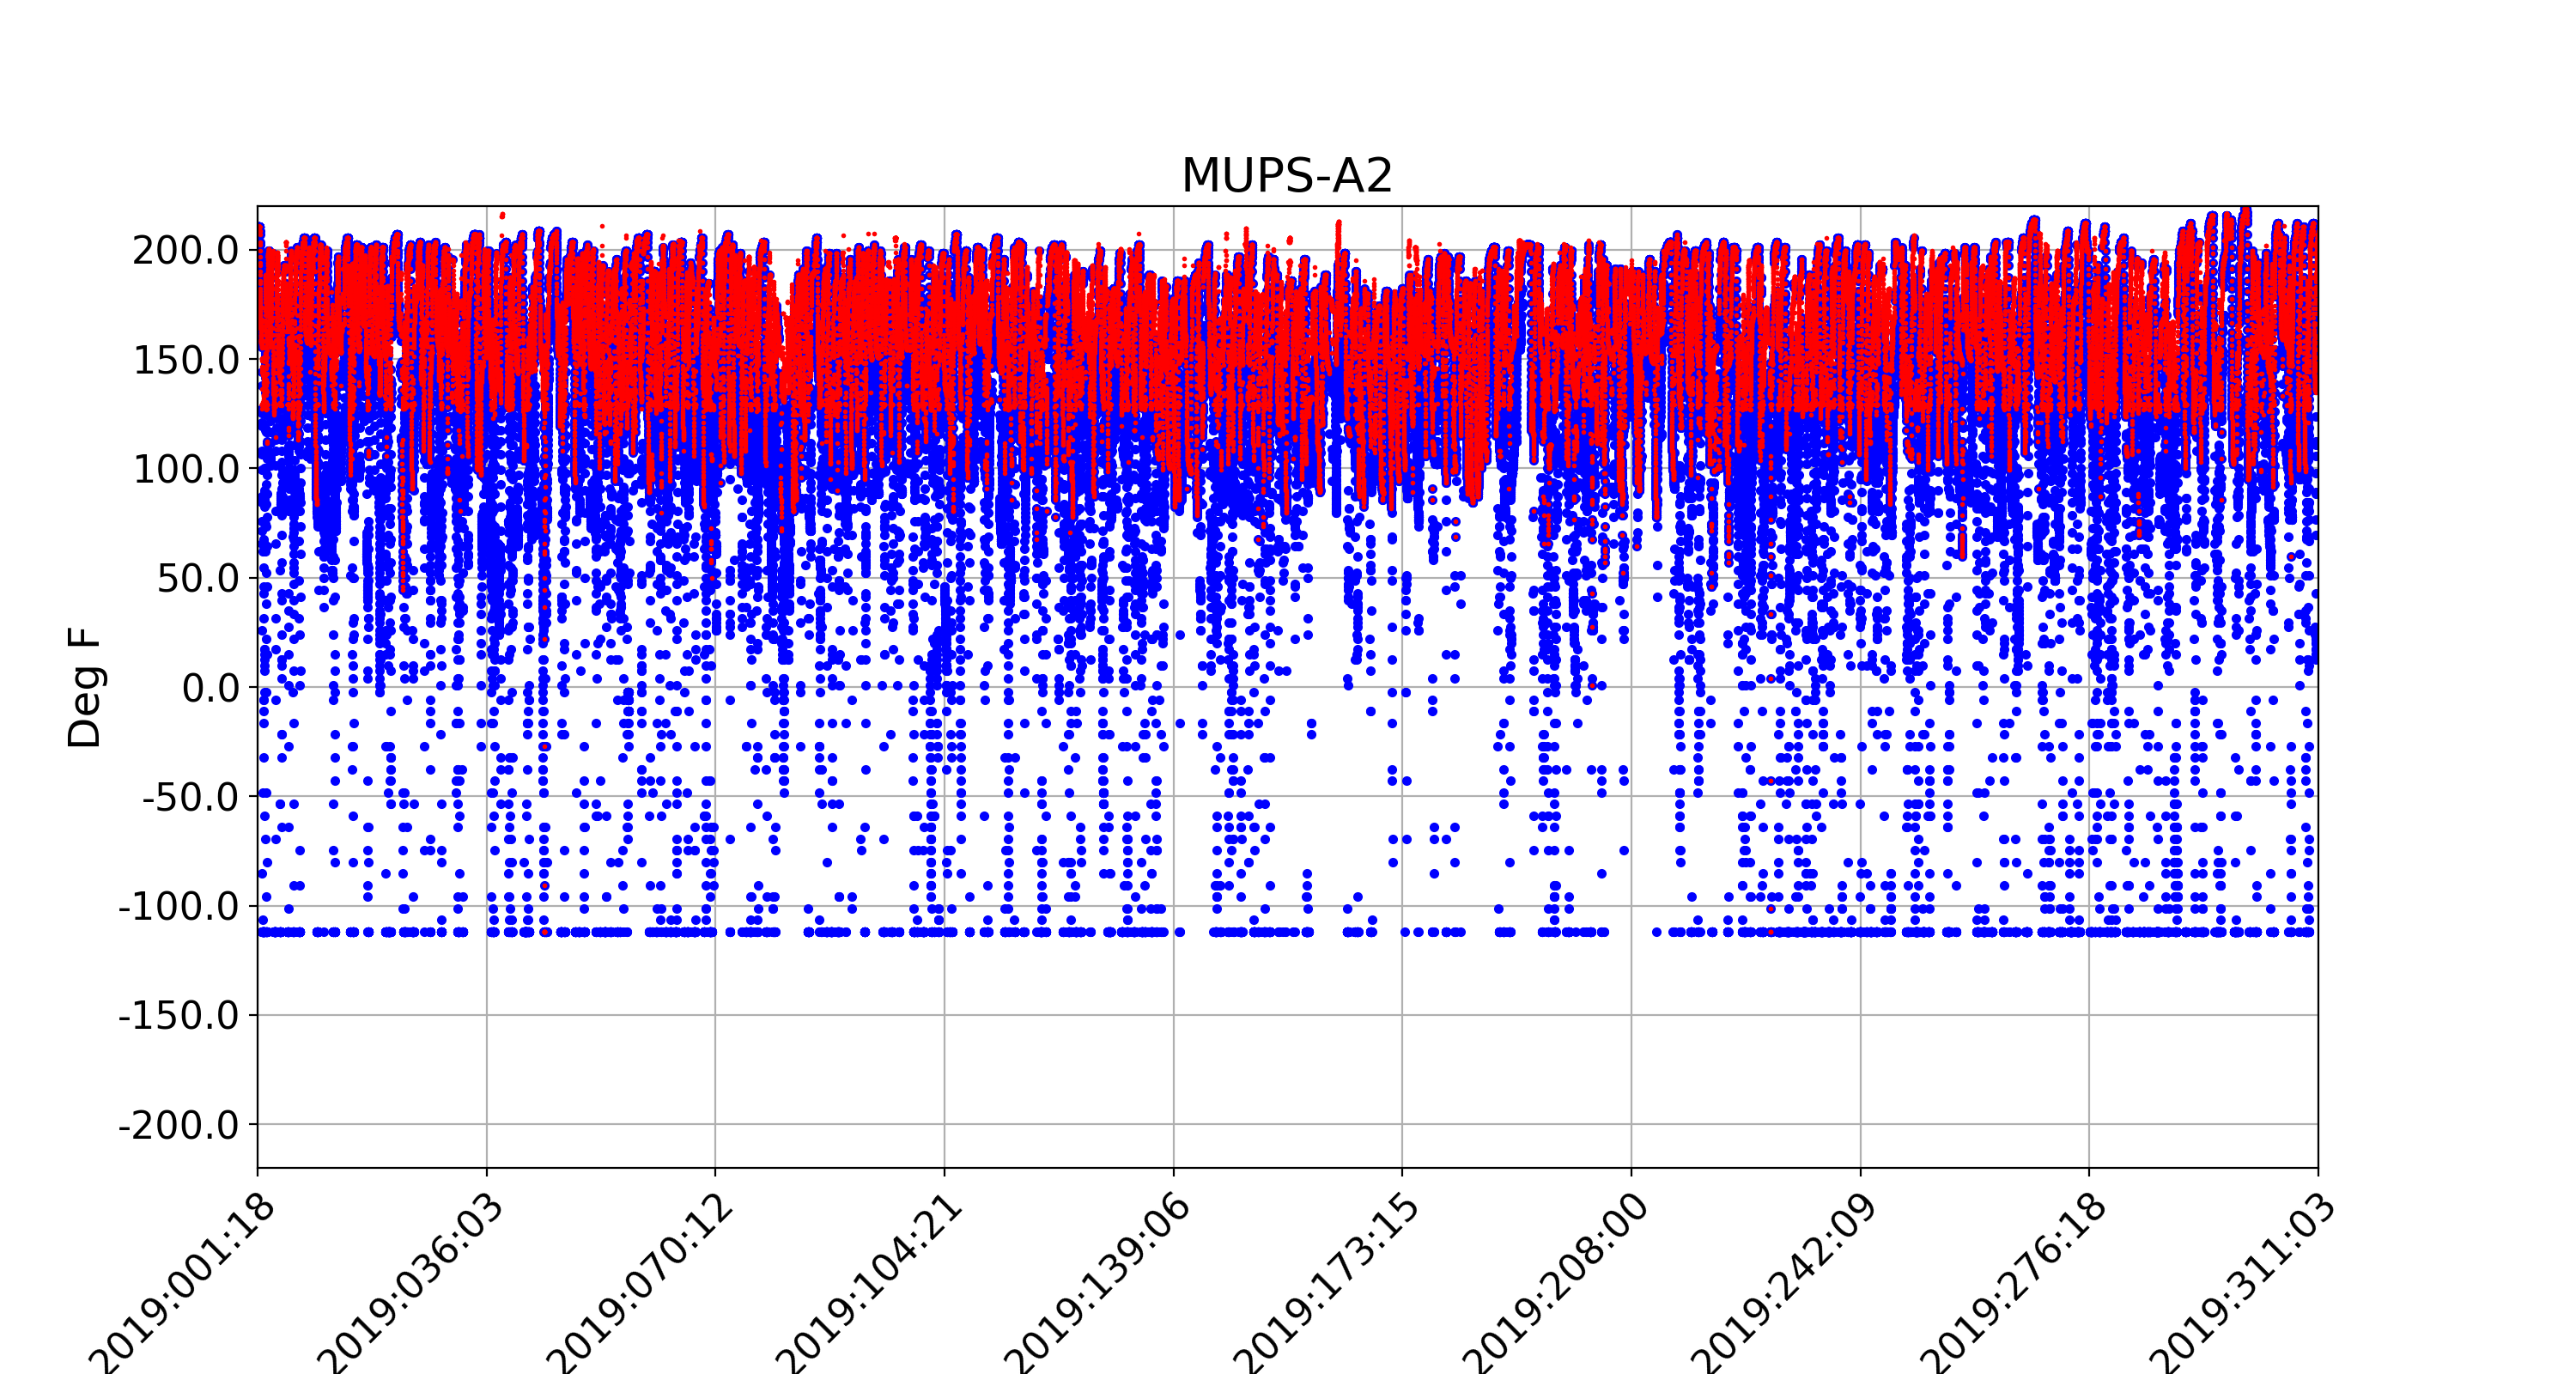

In [11]:
fig, ax = genplot(tstart=tstart, tstop=tstop, ymin=-220, ymax=220)
ax.plot(times,vals,'b.')
ax.plot(times,corrected_temps,'r.',markersize=2)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Deg F',fontsize=18)
plt.title('MUPS-A2', fontsize=20)